# Presentacion: Analisis y prediccion del mercado de bitcoin

### Introducción
En la actualidad, el mercado de criptomonedas es un sector dinámico y fascinante que ofrece oportunidades únicas para el análisis de datos y la comprensión de las tendencias financieras. Este proyecto se enfoca en explorar este emocionante campo utilizando una de las herramientas más poderosas disponibles: la API de Binance.

### ¿Qué es Binance?
Binance es una de las plataformas de intercambio de criptomonedas más grandes y reconocidas a nivel mundial. Ofrece a sus usuarios una API rica y robusta que les permite acceder a una amplia gama de datos del mercado en tiempo real. Esto incluye datos históricos de precios, detalles de operaciones individuales, volúmenes de trading y mucho más.

### Objetivo del Proyecto
El objetivo principal de este proyecto es aprovechar los datos proporcionados por la API de Binance para obtener insights valiosos sobre el comportamiento del mercado de Bitcoin (BTC), la criptomoneda líder. Nos enfocaremos en extraer datos históricos de precios y operaciones de BTC en comparación con el USD, analizando las tendencias, volatilidades y posibles patrones de trading.

### Metodologia

- Descarga de Datos: Utilizaremos la API de Binance para descargar datos históricos de precios y operaciones de Bitcoin en intervalos de tiempo específicos.

- Limpieza y Preprocesamiento de Datos: Realizaremos una limpieza exhaustiva de los datos para eliminar valores atípicos, datos faltantes y cualquier otro factor que pueda afectar la calidad del análisis.

- Análisis Exploratorio de Datos (EDA): Exploraremos los datos para identificar tendencias, patrones y relaciones entre las variables. Esto nos ayudará a comprender mejor el comportamiento del mercado de Bitcoin.

- Modelado Predictivo: Utilizaremos técnicas de modelado predictivo para intentar prever el aumento o descenso de Bitcoin a corto plazo. Esto puede implicar el uso de modelos de regresión, series temporales u otras técnicas de aprendizaje automático.

- Evaluación de Modelos: Evaluaremos el rendimiento de nuestros modelos utilizando métricas relevantes y técnicas de validación cruzada para garantizar su robustez y precisión.

### Análisis de Datos del Mercado de Criptomonedas con Binance API

- En la era digital actual, el mercado de criptomonedas ha emergido como un campo fascinante y dinámico, ofreciendo oportunidades únicas para el análisis de datos y la comprensión de las tendencias del mercado financiero. Nuestro proyecto se centra en explorar este sector vibrante utilizando una de las herramientas más poderosas en el mundo de las criptomonedas: la API de Binance.

- Binance, siendo una de las plataformas de intercambio de criptomonedas más grandes y reconocidas a nivel mundial, proporciona una API rica y robusta, permitiendo a los usuarios acceder a una amplia gama de datos del mercado en tiempo real. Esto incluye, pero no se limita a, datos históricos de precios, detalles de operaciones individuales, volúmenes de trading, y mucho más.

- El objetivo principal de este proyecto es aprovechar estos datos para obtener insights valiosos sobre el comportamiento del mercado de Bitcoin (BTC), la criptomoneda líder en el mercado. Nos centraremos en extraer datos históricos de precios y operaciones de BTC comparados con el USD, analizando las tendencias, volatilidades y posibles patrones de trading.

- Al final de este proyecto, esperamos tener un análisis detallado y multifacético del mercado de Bitcoin, brindando un panorama claro no solo para los entusiastas de las criptomonedas, sino también para aquellos interesados en las finanzas y la tecnología. Este desafío es una excelente oportunidad para sumergirnos en el mundo del análisis de datos financieros y abrir la puerta a futuras investigaciones y proyectos en este apasionante campo.

# Descripcion

Para esto utilizaremos la API de binance a travez de su cliente en python, La cual nos deja acceso a muchas variables pero en estos momentos solo nos centraremos en el precio. 

Una vez el modelo este en funcionamiento, la misma api de binance permite realizar compras y ventas de BTC en un muy corto periodo de tiempo

In [1]:
# paquetes necesarios
import requests
import pandas as pd
import hmac
import hashlib
import time
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
from decouple import config
from binance.client import Client
import plotly.graph_objs as go
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
##api_key = config('API_KEY')
##api_secret = config('API_SECRET')
##api_limit = 1000
requestDays = 3365
limit = 1000

## Descargar ultimos precios

In [3]:
# Crear una instancia del cliente de Binance
client = Client(api_key, api_secret)

# Calcular las fechas para el último mes
end_date = datetime.now(timezone.utc)
start_date = end_date - timedelta(days=requestDays)

# Convertir las fechas a milisegundos (que es el formato que la API de Binance espera)
start_date_timestamp = int(start_date.timestamp() * 1000)
end_date_timestamp = int(end_date.timestamp() * 1000)

# Obtener los datos del precio del Bitcoin para el último mes con intervalo de 1 minuto
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1MINUTE

In [4]:

# Inicializar una lista para almacenar los datos
all_klines = []

# Hacer llamadas sucesivas para obtener más datos (limitando cada llamada a 500)

while start_date_timestamp < end_date_timestamp:
    klines = client.get_klines(symbol=symbol, interval=interval, startTime=start_date_timestamp, endTime=end_date_timestamp, limit=limit)
    
    # Verificar si hay datos en la respuesta
    if not klines:
        break
    
    all_klines.extend(klines)
    
    # Actualizar el startTime para la siguiente llamada
    start_date_timestamp = int((pd.to_datetime(klines[-1][0], unit='ms') + timedelta(minutes=1)).timestamp() * 1000)

# Comprobar si se recuperaron datos antes de crear el DataFrame
if all_klines:
    # Crear un DataFrame de Pandas con todos los datos
    columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
    df = pd.DataFrame(all_klines, columns=columns)

    # Convertir el timestamp a formato de fecha y hora legible
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Mostrar el DataFrame
    df.info()
else:
    print("No se encontraron datos para el período especificado.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464046 entries, 0 to 3464045
Data columns (total 12 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   timestamp                     datetime64[ns]
 1   open                          object        
 2   high                          object        
 3   low                           object        
 4   close                         object        
 5   volume                        object        
 6   close_time                    int64         
 7   quote_asset_volume            object        
 8   number_of_trades              int64         
 9   taker_buy_base_asset_volume   object        
 10  taker_buy_quote_asset_volume  object        
 11  ignore                        object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 317.1+ MB


In [5]:
df.sample(5)

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
2915782,2023-03-09 22:54:00,20367.54000000,20367.60000000,20349.80000000,20366.14000000,152.80626000,1678402499999,3110649.86622460,5310,71.73442000,1460322.37875660,0
721112,2019-01-03 01:53:00,3837.00000000,3839.41000000,3837.00000000,3838.92000000,5.38810700,1546480439999,20679.73110846,51,3.67291100,14097.35517225,0
3031699,2023-05-29 12:11:00,27926.10000000,27926.10000000,27913.92000000,27913.93000000,17.67085000,1685362319999,493390.68439850,412,3.23715000,90388.33599150,0
308750,2018-03-21 11:19:00,9062.00000000,9066.98000000,9059.00000000,9061.00000000,9.92350200,1521631199999,89909.88808662,103,6.33591900,57406.82377399,0
1584127,2020-08-26 05:54:00,11364.64000000,11365.80000000,11362.42000000,11363.87000000,20.79931000,1598421299999,236359.66834977,431,6.72096800,76375.50849548,0


In [6]:
## save df to backup.json
df.to_json('backup.json')

In [2]:
## recuperar backup.json to df
df = pd.read_json('backup.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3464046 entries, 0 to 3464045
Data columns (total 12 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   timestamp                     datetime64[ns]
 1   open                          float64       
 2   high                          float64       
 3   low                           float64       
 4   close                         float64       
 5   volume                        float64       
 6   close_time                    datetime64[ns]
 7   quote_asset_volume            float64       
 8   number_of_trades              int64         
 9   taker_buy_base_asset_volume   float64       
 10  taker_buy_quote_asset_volume  float64       
 11  ignore                        int64         
dtypes: datetime64[ns](2), float64(8), int64(2)
memory usage: 343.6 MB


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


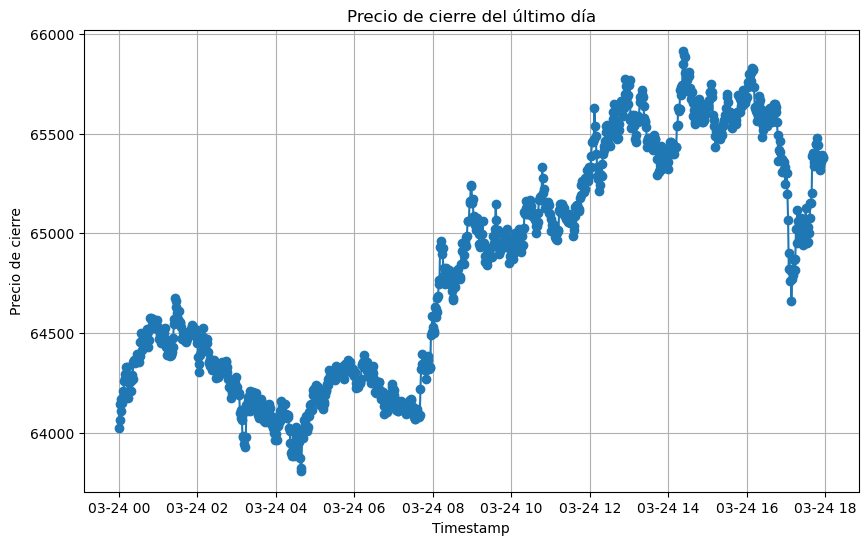

El precio máximo en el último día: $ 65915.73
El precio mínimo en el último día: $ 63808.26
La tendencia del precio en el último día es ASCENDENTE
La variación porcentual del precio en el último día es: 2.12%


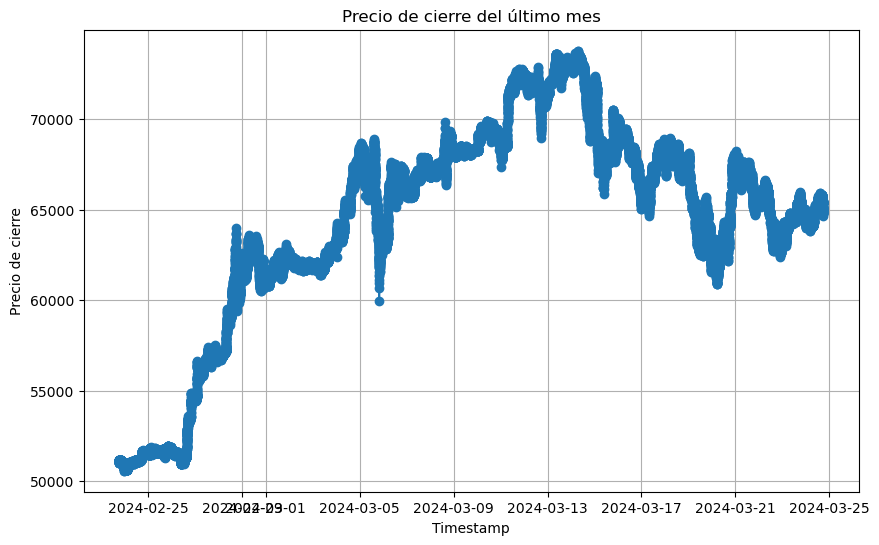

El precio máximo en el último mes: $ 73775.54
El precio mínimo en el último mes: $ 50571.59
La tendencia del precio en el último mes es ASCENDENTE
La variación porcentual del precio en el último mes es: 27.84%


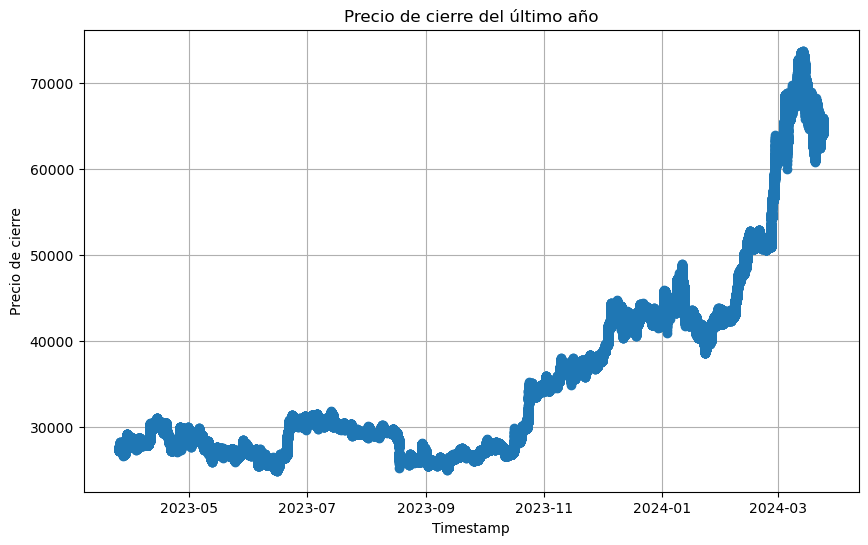

El precio máximo en el último año: $ 73775.54
El precio mínimo en el último año: $ 24856.98
La tendencia del precio en el último año es ASCENDENTE
La variación porcentual del precio en el último año es: 137.88%


In [4]:
# Lista de opciones para el dropdown
opciones = ['Año', 'Mes', 'Dia']

# Crear el dropdown con un ancho personalizado para la descripción
dropdown = widgets.Dropdown(options=opciones, description='Selecciona un rango de tiempo:', style={'description_width': 'initial'})

# Función para imprimir solo el valor seleccionado
def imprimir_valor_seleccionado(change):
    if change.new == 'Dia':
        # Filtra el DataFrame para obtener solo los datos del último día
        ultimo_dia = df[df['timestamp'].dt.date == df['timestamp'].max().date()]

        plt.figure(figsize=(10, 6))
        plt.plot(ultimo_dia['timestamp'], ultimo_dia['close'], marker='o')
        plt.title('Precio de cierre del último día')
        plt.xlabel('Timestamp')
        plt.ylabel('Precio de cierre')
        plt.grid(True)
        plt.show()

        # Calcular el máximo y el mínimo del precio en el último día
        precio_maximo = ultimo_dia['close'].max()
        precio_minimo = ultimo_dia['close'].min()

        # Verificar la tendencia del precio en el último día
        precio_inicio = ultimo_dia.iloc[0]['close']
        precio_fin = ultimo_dia.iloc[-1]['close']
        if precio_fin > precio_inicio:
            tendencia = "ASCENDENTE"
        elif precio_fin < precio_inicio:
            tendencia = "DESCENDENTE"
        else:
            tendencia = "CONSTANTE"

        # Calcular la variación porcentual del precio en el último día
        variacion_porcentual = ((precio_fin - precio_inicio) / precio_inicio) * 100

        print("El precio máximo en el último día:", "$", precio_maximo)
        print("El precio mínimo en el último día:", "$", precio_minimo)
        print("La tendencia del precio en el último día es", tendencia)
        print("La variación porcentual del precio en el último día es:", "{:.2f}%".format(variacion_porcentual))

    elif change.new == 'Mes':
        # Filtra el DataFrame para obtener solo los datos del último mes
        ultimo_mes = df[df['timestamp'] > df['timestamp'].max() - timedelta(days=30)]

        plt.figure(figsize=(10, 6))
        plt.plot(ultimo_mes['timestamp'], ultimo_mes['close'], marker='o')
        plt.title('Precio de cierre del último mes')
        plt.xlabel('Timestamp')
        plt.ylabel('Precio de cierre')
        plt.grid(True)
        plt.show()

        # Calcular el máximo y el mínimo del precio en el último mes
        precio_maximo = ultimo_mes['close'].max()
        precio_minimo = ultimo_mes['close'].min()

        # Verificar la tendencia del precio en el último mes
        precio_inicio = ultimo_mes.iloc[0]['close']
        precio_fin = ultimo_mes.iloc[-1]['close']
        if precio_fin > precio_inicio:
            tendencia = "ASCENDENTE"
        elif precio_fin < precio_inicio:
            tendencia = "DESCENDENTE"
        else:
            tendencia = "CONSTANTE"

        # Calcular la variación porcentual del precio en el último mes
        variacion_porcentual = ((precio_fin - precio_inicio) / precio_inicio) * 100

        print("El precio máximo en el último mes:", "$", precio_maximo)
        print("El precio mínimo en el último mes:", "$", precio_minimo)
        print("La tendencia del precio en el último mes es", tendencia)
        print("La variación porcentual del precio en el último mes es:", "{:.2f}%".format(variacion_porcentual))

    elif change.new == 'Año':
        # Filtra el DataFrame para obtener solo los datos del último año
        ultimo_anio = df[df['timestamp'] > df['timestamp'].max() - timedelta(days=365)]

        plt.figure(figsize=(10, 6))
        plt.plot(ultimo_anio['timestamp'], ultimo_anio['close'], marker='o')
        plt.title('Precio de cierre del último año')
        plt.xlabel('Timestamp')
        plt.ylabel('Precio de cierre')
        plt.grid(True)
        plt.show()

        # Calcular el máximo y el mínimo del precio en el último año
        precio_maximo = ultimo_anio['close'].max()
        precio_minimo = ultimo_anio['close'].min()

        # Verificar la tendencia del precio en el último año
        precio_inicio = ultimo_anio.iloc[0]['close']
        precio_fin = ultimo_anio.iloc[-1]['close']
        if precio_fin > precio_inicio:
            tendencia = "ASCENDENTE"
        elif precio_fin < precio_inicio:
            tendencia = "DESCENDENTE"
        else:
            tendencia = "CONSTANTE"

        # Calcular la variación porcentual del precio en el último año
        variacion_porcentual = ((precio_fin - precio_inicio) / precio_inicio) * 100

        print("El precio máximo en el último año:", "$", precio_maximo)
        print("El precio mínimo en el último año:", "$", precio_minimo)
        print("La tendencia del precio en el último año es", tendencia)
        print("La variación porcentual del precio en el último año es:", "{:.2f}%".format(variacion_porcentual))

# Vincular la función con el evento de cambio de valor del dropdown
dropdown.observe(imprimir_valor_seleccionado, names='value')

# Mostrar el dropdown
display(dropdown)

En este caso se denota una tendencia bajista del precio, Se puede correlacionar con el fin del pico de compra, Pero se espera que remonte dado el "Halving", el cual es un momento en donde la cantidad de bitcoins que se minan por bloque se divide

Con este grafico se puede ver que el precio del bitcoin se disparo el 26 de febrero en donde se acepto al bitcoin como una moneda en la bolsa de comercio de NY

In [5]:
### evaluar que variables pueden servir para entrenar un modelo
df.describe()


,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
count,3.464046e+06,3.464046e+06,3.464046e+06,3.464046e+06,3.464046e+06,3.464046e+06,3.464046e+06,3.464046e+06,3.464046e+06,3464046.0
mean,2.199047e+04,2.200319e+04,2.197761e+04,2.199047e+04,5.040741e+01,1.156244e+06,1.013417e+03,2.507410e+01,5.732116e+05,0.0
std,1.674807e+04,1.675768e+04,1.673846e+04,1.674809e+04,9.423487e+01,2.307725e+06,1.773296e+03,4.800024e+01,1.183688e+06,0.0
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,8.076862e+03,8.082000e+03,8.071100e+03,8.076870e+03,1.077422e+01,1.228969e+05,1.670000e+02,4.851082e+00,5.437190e+04,0.0
50%,1.674824e+04,1.675715e+04,1.673926e+04,1.674842e+04,2.281681e+01,3.996833e+05,4.430000e+02,1.098375e+01,1.867137e+05,0.0
75%,3.397719e+04,3.400000e+04,3.394998e+04,3.397717e+04,5.090773e+01,1.275566e+06,1.038000e+03,2.544807e+01,6.233012e+05,0.0
max,7.377555e+04,7.377700e+04,7.368261e+04,7.377554e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07,0.0


# Establecer cuales variables son utiles para el modelo

In [6]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore'],
      dtype='object')

In [7]:
# Definir el modelo
model_financial = 'close ~ open + high + low + volume + number_of_trades'

# Ajustar el modelo
lm_financial = sm.OLS.from_formula(model_financial, data=df).fit()

# Imprimir el resumen del modelo
lm_financial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.155e+12
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:08:35   Log-Likelihood:            -1.3792e+07
No. Observations:             3464046   AIC:                         2.758e+07
Df Residuals:                 3464040   BIC:                         2.758e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0215      0.012      1.758      0.079      -0.002       0.045
open                -0.4698      0.000  -1186.104      0.000      -0.471      -0.469
high                 0.7367      0.000   2490.812      0.000       0.736       0.737
low                  0.7331      0.000   2483.604      0.000       0.733       0.734
volume               0.0003      0.000      2.027      0.043     1.1e-05       0.001
number_of_trades  4.277e-05   8.78e-06      4.872      0.000    2.56e-05       6e-05
==============================================================================
Omnibus:                  2598932.585   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      14183405806.378
Skew:                          -1.924   Prob(JB):                         0.00
Kurtosis:                     316.452   Cond. No.                     8.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Suponiendo que 'df' es tu DataFrame de Pandas

# Seleccionar los primeros 1000 valores del DataFrame
df_subset = df.head(1000)

# Dividir los datos en características (X) y la variable objetivo (y)
X = df_subset.drop(['close'], axis=1)  # Mantener las columnas de marca de tiempo
X = X.drop(['close_time'], axis=1)  # Excluir columnas de marca de tiempo
y = df_subset['close']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar solo las características numéricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Entrenar el modelo SVM
svm_model = SVR(kernel='rbf')  # 'rbf' es el kernel no lineal más común
svm_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Calcular el error cuadrático medio en los conjuntos de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Error cuadrático medio en el conjunto de entrenamiento:", mse_train)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)